In [19]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import torch
import utils
import test

from model import generate_model
import torch.nn as nn

import dataloader
import pandas as pd
import os
from torch.utils.data import DataLoader

In [4]:
config = utils.load_config()

In [15]:
#데이터셋 load(test)
df_dataset = pd.read_csv(config['PATH_DATASET_CSV'])
df_dataset = df_dataset.dropna().reset_index(drop=True)
df_adni = df_dataset[df_dataset['source'] == 'ADNI']
X_test = df_adni.drop(labels='group_maxinc',axis=1)
y_test = df_adni['group_maxinc']

testdata=dataloader.MRIDataset(X_test,y_test)
test_dataloader  = DataLoader(testdata, batch_size=1, shuffle=False)

print('test_dataloader : ',len(test_dataloader.dataset))

test_dataloader :  166


In [16]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
checkpoint = torch.load('result/resnet18_best.pth', map_location=device)

In [17]:
model, _ = generate_model(model_name='resnet',model_depth = 18,n_classes=3,resnet_shortcut='B')
model.to(device)
model.load_state_dict(checkpoint['state_dict'])


d:\MyGit\BrainMR_MCI\models\resnet.py:140: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  m.weight = nn.init.kaiming_normal(m.weight, mode='fan_out')


<All keys matched successfully>

In [24]:
test_dataloader.dataset

TypeError: Cannot index by location index with a non-integer key

In [25]:
log_path = config['log_path']
criterion_clf = nn.CrossEntropyLoss().to(device)

test_logger = utils.Logger(os.path.join(log_path, 'test.log'),['loss','acc'])
#test.test(device,test_dataloader,model,criterion_clf,test_logger)

In [27]:
model.eval()

y_score=[]
for i, (inputs, targets) in enumerate(test_dataloader):
    outputs = model(inputs)
    y_score.append(outputs)
    loss = criterion_clf(outputs, targets)


MemoryError: Unable to allocate 128. MiB for an array with shape (256, 256, 256) and data type float64

In [ ]:

# ROC & AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:
# ROC & AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
plt.figure(figsize=(15, 5))
for idx, i in enumerate(range(n_classes)):
    plt.subplot(131+idx)
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class %0.0f' % idx)
    plt.legend(loc="lower right")
plt.show()

print("roc_auc_score: ", roc_auc_score(y_test, y_score, multi_class='raise'))

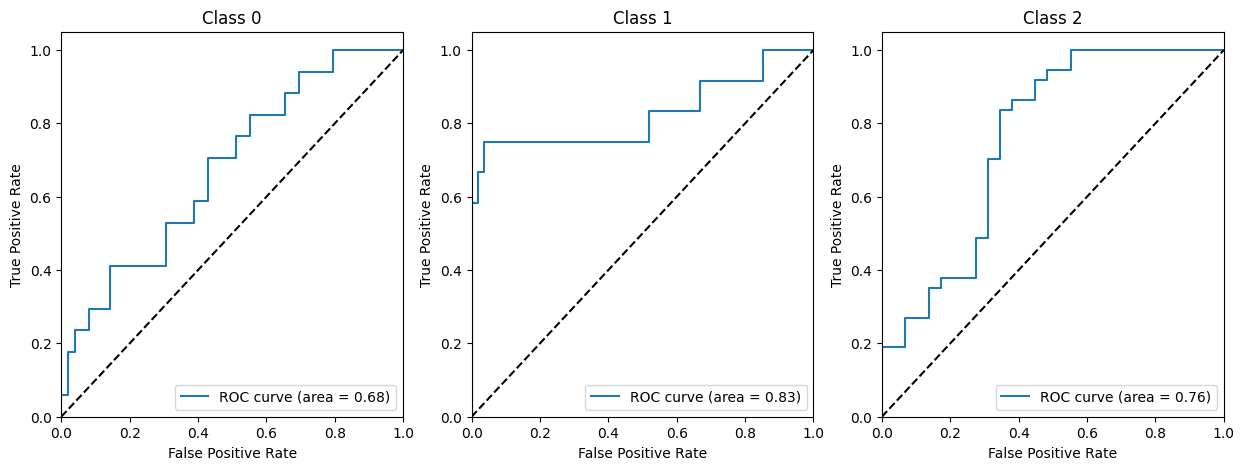

roc_auc_score:  0.7530587850986125


In [2]:

# make sample data
n_classes = 3
X, y = make_classification(n_samples=200, n_features=5,
                           n_informative=3, n_redundant=2
                           , n_clusters_per_class=2
                           , n_classes=n_classes
                           , weights=[0.3, 0.2, 0.5]
                           , random_state=99)

y = label_binarize(y, classes=[0,1,2])

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# classifier
clf = OneVsRestClassifier(GaussianNB())
clf.fit(X_train, y_train)
y_score = clf.predict_proba(X_test)
  # 나이브베이즈 모델은 predict_proba 메서드로 각 클래스별 probability를 구할 수 있습니다.

# ROC & AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
plt.figure(figsize=(15, 5))
for idx, i in enumerate(range(n_classes)):
    plt.subplot(131+idx)
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class %0.0f' % idx)
    plt.legend(loc="lower right")
plt.show()

print("roc_auc_score: ", roc_auc_score(y_test, y_score, multi_class='raise'))